# Train and Save the Model

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import os

# Step 1: Prepare the data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Validation data normalization

# Set up paths to your dataset
train_dir = 'Dataset/train'  # Replace with your training data path
validation_dir = 'Dataset/valid'  # Replace with your validation data path

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

# Step 2: Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 3: Train the model (adjust epochs and callbacks)
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=2,  # Stop training if validation loss doesn't improve for 2 consecutive epochs
    restore_best_weights=True  # Restore the best model weights
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,  # Limit training to 5 epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Step 4: Save the model (use Keras format to avoid warnings)
model.save('plant_disease_model.keras')

print("Model training complete. The model is saved as 'plant_disease_model.keras'.")


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1955s 889ms/step - accuracy: 0.4544 - loss: 1.8703 - val_accuracy: 0.7323 - val_loss: 0.9829
Epoch 2/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 86s 39ms/step - accuracy: 0.8750 - loss: 0.3488 - val_accuracy: 0.7491 - val_loss: 0.8986
Epoch 3/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1837s 836ms/step - accuracy: 0.8275 - loss: 0.5281 - val_accuracy: 0.8363 - val_loss: 0.6038
Epoch 4/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - accuracy: 0.7812 - loss: 0.5126 - val_accuracy: 0.8607 - val_loss: 0.4781
Epoch 5/5
2196/2196 ━━━━━━━━━━━━━━━━━━━━ 1523s 693ms/step - accuracy: 0.8776 - loss: 0.3703 - val_accuracy: 0.8645 - val_loss: 0.4449
Model training complete. The model is saved as 'plant_disease_model.keras'.


# Plot Accuracy and Loss

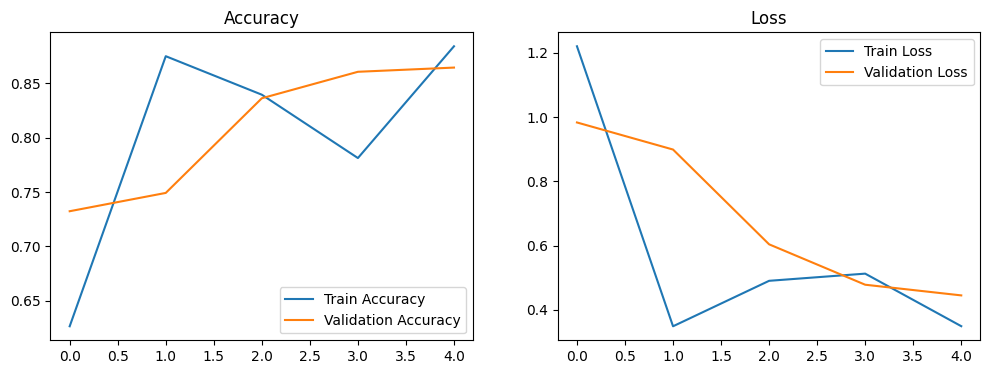

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

# CNN Model Summary

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths for datasets
train_dir = "Dataset/train"
valid_dir = "Dataset/valid"

# Load datasets with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_ds = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(128, 128), 
    batch_size=32, 
    class_mode="categorical"
)

valid_ds = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(128, 128), 
    batch_size=32, 
    class_mode="categorical"
)

# Get class names from training data
class_names = list(train_ds.class_indices.keys())
print("Class Names:", class_names)

# Build the CNN model
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the CNN model summary
cnn_model.summary()


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold'

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

# Visualization of Accuracy Result

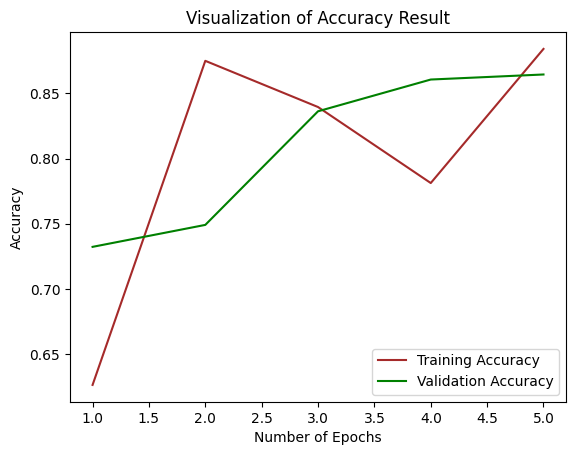

In [17]:
import matplotlib.pyplot as plt

# Assuming history is the training result obtained from model.fit()
# If the training history is stored in 'history' object from model.fit(), use this code.

epochs = [i for i in range(1, 6)]  # Epochs from 1 to 5

# Plot Training Accuracy
plt.plot(epochs, history.history['accuracy'], color='brown', label='Training Accuracy')

# Plot Validation Accuracy
plt.plot(epochs, history.history['val_accuracy'], color='green', label='Validation Accuracy')

# Add labels and title
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Display Confusion Matrix and Prediction

Model loaded successfully.
Found 17572 files belonging to 38 classes.
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Image shape: (32, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Image shape: (32, 15

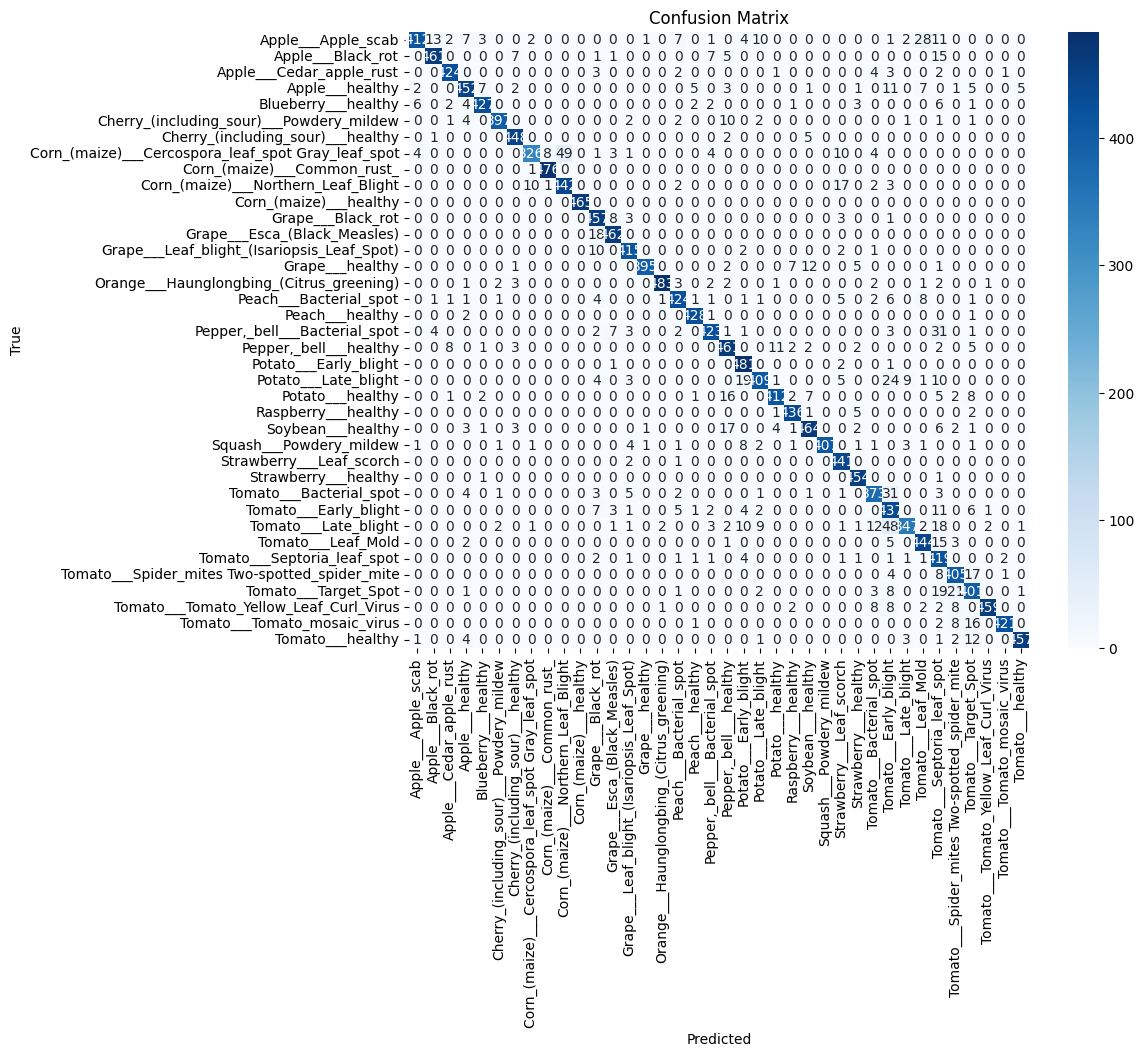

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.82      0.89       504
                                 Apple___Black_rot       0.96      0.93      0.94       497
                          Apple___Cedar_apple_rust       0.97      0.96      0.96       440
                                   Apple___healthy       0.93      0.90      0.92       502
                               Blueberry___healthy       0.97      0.94      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.94      0.96       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.80      0.87       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight      

In [27]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the trained model
model_path = "plant_disease_model.keras"  # Update the path if needed
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")

# Define test dataset path
test_dir = "Dataset/valid"  # Update this path to where your test images are stored

# Load test dataset with the correct image size expected by the model
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),  # Resize images to match the model's expected input size
    batch_size=32,
    label_mode="categorical"
)

# Get class names (this is already available in your case)
class_names = test_ds.class_names

# Normalize the test dataset (if necessary)
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

# Make predictions
y_true = []
y_pred = []

# Iterate through the test dataset in batches
for images, labels in test_ds:
    # Ensure the input images are of shape (batch_size, 150, 150, 3)
    print(f"Image shape: {images.shape}")

    # Predict the disease classes
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
